In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the data 
sales_data = pd.read_csv('/content/drive/MyDrive/Train (1).csv')
#checking the first 5 rows of the dataframe
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales_data.shape

(8523, 12)

In [5]:
# getting some information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
sales_data['Item_Weight'].mean()

12.857645184135976

In [8]:
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)

In [9]:
sales_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [10]:
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [11]:
miss_values = sales_data['Outlet_Size'].isnull()

In [12]:
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [13]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
encoder = LabelEncoder()

In [17]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [18]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [19]:
#Let's have all the features in X & target in Y
X = sales_data.drop(columns='Item_Outlet_Sales', axis=1)
y = sales_data['Item_Outlet_Sales']

In [20]:
X.shape

(8523, 11)

In [21]:
y.shape

(8523,)

In [22]:
x_train = X.iloc[0:6822] # 80%
x_test = X.iloc[6822:] # 20%
y_train = y.iloc[0:6822] # 80%
y_test = y.iloc[6822:] # 20%
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6822, 11)
(1701, 11)
(6822,)
(1701,)


In [24]:
x_train.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300000,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920000,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500000,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200000,2,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930000,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
95,970,12.857645,1,0.009715,5,120.0414,4,1985,2,0,0
96,382,12.150000,1,0.131384,5,246.0460,9,1999,1,0,1
97,231,8.750000,2,0.074613,6,187.4556,6,2004,2,1,1
98,1442,12.857645,1,0.028460,9,149.9708,5,1985,1,2,3


In [25]:
import numpy as np

x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [26]:
mea = np.mean(x_train,axis = 0)
std = np.std(x_train,axis = 0)
x_train = (x_train-mea)/std
x_test = (x_test-mea)/std

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
import numpy as np

In [29]:
#1dcnn simple
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the input shape
input_shape = x_train.shape[1]

# Create the model
model = Sequential()

# Add the Conv1D layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_shape, 1)))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a dense layer
model.add(Dense(64, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=100,
                    batch_size=128,
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', mode='min', patience=10)])


Epoch 1/100
54/54 [==============================] - 3s 8ms/step - loss: 7511077.0000 - root_mean_squared_error: 2740.6345 - mean_absolute_error: 2148.0823 - val_loss: 7042399.0000 - val_root_mean_squared_error: 2653.7520 - val_mean_absolute_error: 2016.2157
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 5676436.5000 - root_mean_squared_error: 2382.5273 - mean_absolute_error: 1750.9628 - val_loss: 3915588.2500 - val_root_mean_squared_error: 1978.7845 - val_mean_absolute_error: 1422.7502
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 3207997.5000 - root_mean_squared_error: 1791.0884 - mean_absolute_error: 1367.2986 - val_loss: 3004059.5000 - val_root_mean_squared_error: 1733.2223 - val_mean_absolute_error: 1350.1317
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 2817865.7500 - root_mean_squared_error: 1678.6500 - mean_absolute_error: 1308.0599 - val_loss: 2790771.2500 - val_root_mean_squared_error: 1670.5602 -

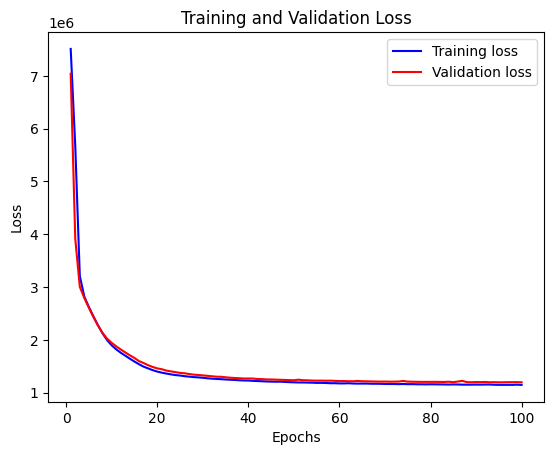

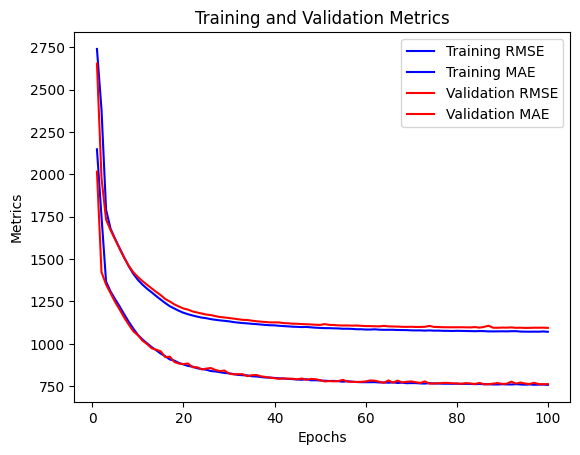

In [30]:
import matplotlib.pyplot as plt

# Get the training history
loss = history.history['loss']
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation metrics
plt.plot(epochs, root_mean_squared_error, 'b-', label='Training RMSE')
plt.plot(epochs, mean_absolute_error, 'b-', label='Training MAE')
plt.plot(epochs, val_root_mean_squared_error, 'r-', label='Validation RMSE')
plt.plot(epochs, val_mean_absolute_error, 'r-', label='Validation MAE')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [31]:
##improved cnn 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the input shape
input_shape = x_train.shape[1]

# Create the model
model = Sequential()

# Add the Conv1D layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_shape, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flatten the output
model.add(Flatten())

# Add a dense layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=100,
                    batch_size=128,
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', mode='min', patience=10)])


Epoch 1/100
54/54 [==============================] - 2s 17ms/step - loss: 5868318.0000 - root_mean_squared_error: 2422.4612 - mean_absolute_error: 1840.8005 - val_loss: 3325200.7500 - val_root_mean_squared_error: 1823.5133 - val_mean_absolute_error: 1471.1160
Epoch 2/100
54/54 [==============================] - 1s 14ms/step - loss: 2885171.7500 - root_mean_squared_error: 1698.5793 - mean_absolute_error: 1322.6111 - val_loss: 2815604.5000 - val_root_mean_squared_error: 1677.9763 - val_mean_absolute_error: 1287.2859
Epoch 3/100
54/54 [==============================] - 1s 14ms/step - loss: 2636956.7500 - root_mean_squared_error: 1623.8710 - mean_absolute_error: 1265.3723 - val_loss: 2556425.0000 - val_root_mean_squared_error: 1598.8824 - val_mean_absolute_error: 1223.2227
Epoch 4/100
54/54 [==============================] - 1s 14ms/step - loss: 2328590.7500 - root_mean_squared_error: 1525.9720 - mean_absolute_error: 1186.0367 - val_loss: 2202381.7500 - val_root_mean_squared_error: 1484.04

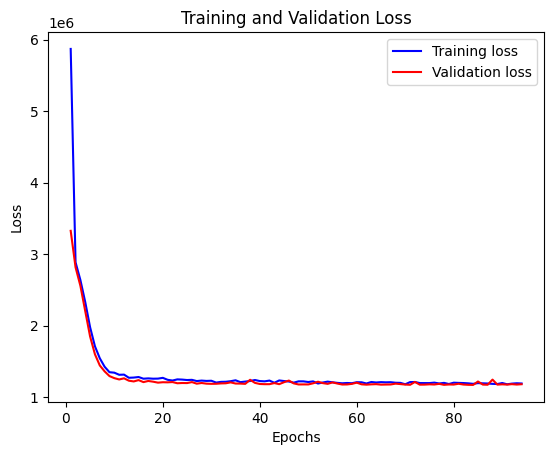

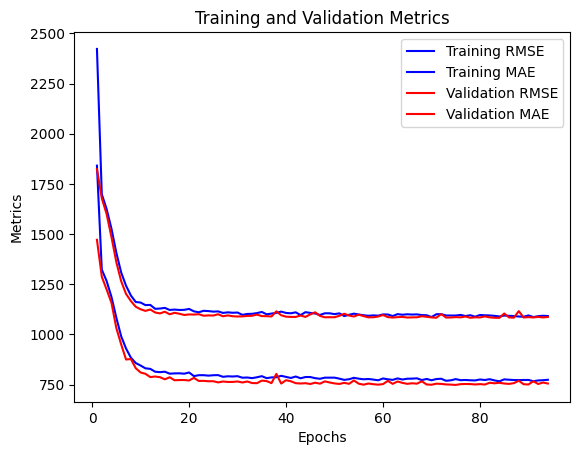

In [32]:
# The best validation (RMSE) achieved during training was 1086.0229, and  (MAE) was 761.2039.

# The average validation RMSE across all epochs was 1292.8812, and the average validation MAE was 927.0652.

import matplotlib.pyplot as plt

# Get the training history
loss = history.history['loss']
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation metrics
plt.plot(epochs, root_mean_squared_error, 'b-', label='Training RMSE')
plt.plot(epochs, mean_absolute_error, 'b-', label='Training MAE')
plt.plot(epochs, val_root_mean_squared_error, 'r-', label='Validation RMSE')
plt.plot(epochs, val_mean_absolute_error, 'r-', label='Validation MAE')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [33]:
## more improved cnn code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the input shape
input_shape = x_train.shape[1]

# Create the model
model = Sequential()

# Add the Conv1D layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_shape, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flatten the output
model.add(Flatten())

# Add additional dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=100,
                    batch_size=128,
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', mode='min', patience=10)])


Epoch 1/100
54/54 [==============================] - 2s 14ms/step - loss: 5248110.0000 - root_mean_squared_error: 2290.8755 - mean_absolute_error: 1746.0267 - val_loss: 2998625.2500 - val_root_mean_squared_error: 1731.6539 - val_mean_absolute_error: 1325.6400
Epoch 2/100
54/54 [==============================] - 1s 11ms/step - loss: 2772393.0000 - root_mean_squared_error: 1665.0504 - mean_absolute_error: 1293.7570 - val_loss: 2582546.7500 - val_root_mean_squared_error: 1607.0304 - val_mean_absolute_error: 1244.3489
Epoch 3/100
54/54 [==============================] - 1s 15ms/step - loss: 2312118.7500 - root_mean_squared_error: 1520.5653 - mean_absolute_error: 1178.7565 - val_loss: 1990824.8750 - val_root_mean_squared_error: 1410.9659 - val_mean_absolute_error: 1087.5117
Epoch 4/100
54/54 [==============================] - 1s 15ms/step - loss: 1831975.7500 - root_mean_squared_error: 1353.5050 - mean_absolute_error: 1027.2365 - val_loss: 1581586.2500 - val_root_mean_squared_error: 1257.61

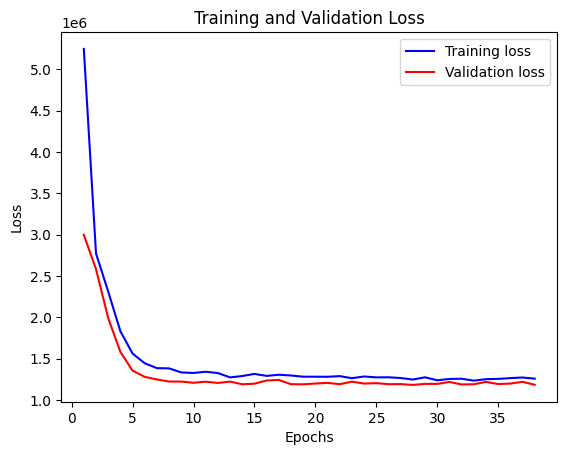

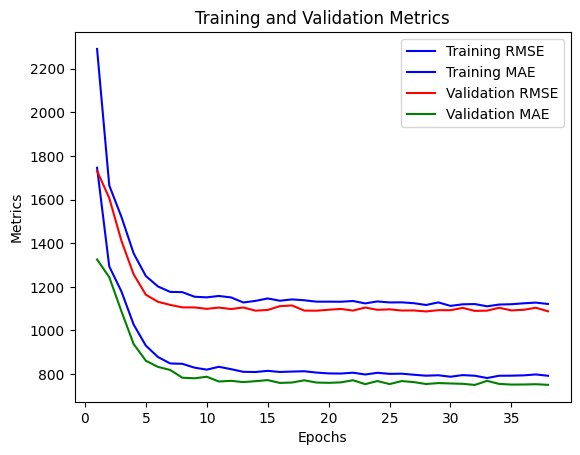

In [34]:
# Root Mean Squared Error (RMSE):

# Training: 1117.5740
# Validation: 1092.8901
# Mean Absolute Error (MAE):

# Training: 804.6284
# Validation: 763.7867


import matplotlib.pyplot as plt

# Get the training history
loss = history.history['loss']
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation metrics
plt.plot(epochs, root_mean_squared_error, 'b-', label='Training RMSE')
plt.plot(epochs, mean_absolute_error, 'b-', label='Training MAE')
plt.plot(epochs, val_root_mean_squared_error, 'r-', label='Validation RMSE')
plt.plot(epochs, val_mean_absolute_error, 'g-', label='Validation MAE')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [37]:
#more improved cnn 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
import tensorflow as tf

# Define the input shape
input_shape = x_train.shape[1]

# Create the model
model = Sequential()

# Add the Conv1D layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_shape, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flatten the output
model.add(Flatten())

# Add additional dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

# Define early stopping callback
es_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=100,
                    batch_size=128,
                    verbose=1,
                    callbacks=[es_callback])


Epoch 1/100
54/54 [==============================] - 2s 13ms/step - loss: 7257457.5000 - root_mean_squared_error: 2693.9668 - mean_absolute_error: 2092.7192 - val_loss: 5358335.5000 - val_root_mean_squared_error: 2314.8079 - val_mean_absolute_error: 1671.2948
Epoch 2/100
54/54 [==============================] - 1s 12ms/step - loss: 3441954.2500 - root_mean_squared_error: 1855.2505 - mean_absolute_error: 1418.7511 - val_loss: 3012978.2500 - val_root_mean_squared_error: 1735.7932 - val_mean_absolute_error: 1336.7115
Epoch 3/100
54/54 [==============================] - 1s 15ms/step - loss: 2887529.5000 - root_mean_squared_error: 1699.2732 - mean_absolute_error: 1321.2670 - val_loss: 2806752.7500 - val_root_mean_squared_error: 1675.3365 - val_mean_absolute_error: 1287.8051
Epoch 4/100
54/54 [==============================] - 1s 16ms/step - loss: 2677115.7500 - root_mean_squared_error: 1636.1895 - mean_absolute_error: 1267.3435 - val_loss: 2579739.0000 - val_root_mean_squared_error: 1606.15

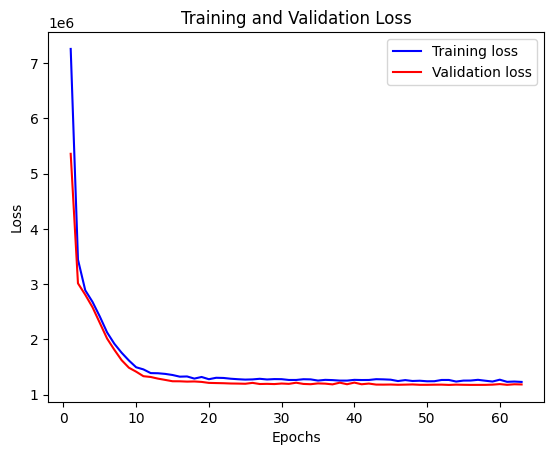

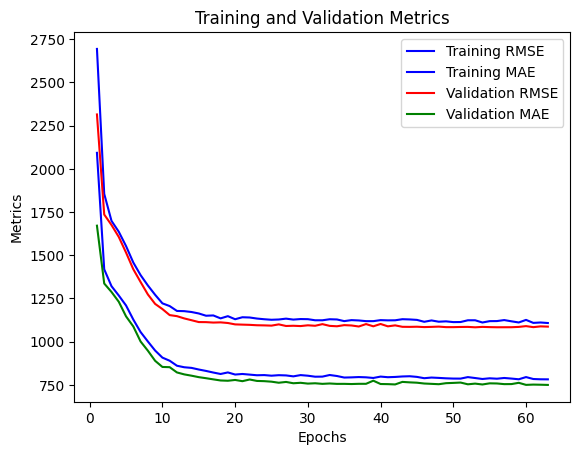

In [38]:
##best results
# Loss: 1169965.2500
# Root Mean Squared Error (RMSE): 1081.4313
# Mean Absolute Error (MAE): 704.7745
# Validation Loss: 1187605.6250
# Validation RMSE: 1090.5536
# Validation MAE: 754.7890

# average results
# Root Mean Squared Error (RMSE):

# Training: 1130.4486
# Validation: 1093.4314
# Mean Absolute Error (MAE):

# Training: 798.4258
# Validation: 770.2620

import matplotlib.pyplot as plt

# Get the training history
loss = history.history['loss']
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation metrics
plt.plot(epochs, root_mean_squared_error, 'b-', label='Training RMSE')
plt.plot(epochs, mean_absolute_error, 'b-', label='Training MAE')
plt.plot(epochs, val_root_mean_squared_error, 'r-', label='Validation RMSE')
plt.plot(epochs, val_mean_absolute_error, 'g-', label='Validation MAE')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()
